# Microfluidics

## Straight Channels

### Velocity profile of the fluid

Raw-ish Data<br>
Exposure time: (0.179 748 535 ± 0.000 000 001)s<br>
Scale on photo: (78 ± 1)px = (100 ± 1) micrometers<br>
Total Channel Size (524 ± 1)px. Bottom will be z=0
- 1: z = (0 ± 1)px, d = (3 ± 1)px)- 
-	2: z = (56 ± 1)px, d = (12 ± 1)- x
-	3: z = (138 ± 1)px, d = (22 ± - px
-	4: z = (233 ± 1)px, d = (37 ± -  px
-	5: z = (296 ± 1)px, d = (26 ±- ) px
-	6: z = (342 ± 1)px, d = (27 - 1) px
-	7: z = (388 ± 1) px, d = (22-  1) px
-	8: z = (443 ± 1) px, d = (2- ± 1) px
-	9: z = (519 ± 1) px, d = (10 ± 1) px


In [22]:
# Total channel size is (524 ± 1)px. Bottom is z = 0
# following values are in pixels
ch_sz = 524
ch_sz_unc = 1
z = [0, 56, 138, 233, 296, 342, 388, 443, 519]
z_unc = [1] * len(z)
# d is the length of the streak
d = [3, 12, 22, 37, 26, 27, 22, 24, 10]
d_unc = [1] * len(z)
print("z, z_unc, d, d_unc")
print(z)
print(z_unc)
print(d)
print(d_unc)
print()

# scale is (78 ± 1)px = (100 ± 1)micrometers
pxmicm = 100/78
pxmicm_unc = pxmicm * ((1/100)**2 + (1/78)**2)**0.5
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# convert previous values to micrometers
for i in range(0, len(z)):
    oldz = z[i]
    oldzu = z_unc[i]
    z[i] = pxmicm * oldz
    if (i != 0):
        # if i == 0 the unit conversion does nothing and the error is 
        # the same
        z_unc[i] = z[i] * ((oldzu/oldz)**2 + (pxmicm_unc/pxmicm)**2)**0.5

    oldd = d[i]
    olddu = d_unc[i]
    d[i]  = pxmicm * oldd
    d_unc[i] = d[i] * ((olddu/oldd)**2 + (pxmicm_unc/pxmicm)**2)**0.5
t1 = ch_sz
t2 = ch_sz_unc
ch_sz *= pxmicm
ch_sz_unc = ch_sz * ((t2/t1)**2 + (pxmicm_unc/pxmicm)**2)**0.5
# convert everything to m
for i in range(0, len(z)):
    z[i] *= 10**(-6)
    z_unc[i] *= 10**(-6)
    d[i] *= 10**(-6)
    d_unc[i] *= 10**(-6)
ch_sz *= 10**(-6)
ch_sz_unc *= 10**(-6)
print("z, z_unc, d, d_unc")
print(z)
print(z_unc)
print(d)
print(d_unc)
print()
print("channel size:", ch_sz, "±", ch_sz_unc)
print()

# velocity
t = 0.179748535 
t_unc = 0.000000001
v = [0] * len(d)
v_unc = [0] * len(d)

for i in range(0, len(v)):
    v[i] = d[i]/t
    v_unc[i] = v[i] * ((t_unc/t)**2 + (d_unc[i]/d[i])**2)**0.5
print("v, v_unc")
print(v)
print(v_unc)

z, z_unc, d, d_unc
[0, 56, 138, 233, 296, 342, 388, 443, 519]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 12, 22, 37, 26, 27, 22, 24, 10]
[1, 1, 1, 1, 1, 1, 1, 1, 1]

scale: 1.2820512820512822 ± 0.020845284500312544

z, z_unc, d, d_unc
[0.0, 7.179487179487179e-05, 0.00017692307692307693, 0.0002987179487179487, 0.0003794871794871795, 0.0004384615384615385, 0.0004974358974358975, 0.000567948717948718, 0.0006653846153846154]
[1e-06, 1.7338767741649076e-06, 3.149407318983895e-06, 5.02330880091783e-06, 6.301989805508536e-06, 7.2434481573416745e-06, 8.188951120661542e-06, 9.323032021375684e-06, 1.0894401435666022e-05]
[3.846153846153847e-06, 1.5384615384615387e-05, 2.8205128205128207e-05, 4.7435897435897435e-05, 3.3333333333333335e-05, 3.461538461538462e-05, 2.8205128205128207e-05, 3.0769230769230774e-05, 1.282051282051282e-05]
[1.2835755617736054e-06, 1.306226327011819e-06, 1.361604207758054e-06, 1.496168916802186e-06, 1.3919033690156225e-06, 1.4001517277172805e-06, 1.361604207758054e-06, 1.37620579859

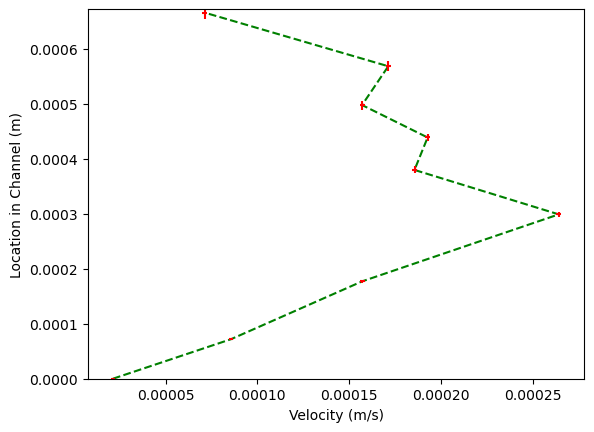

In [23]:
# plot YOU ARE HERE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots()

# plot
ax.plot(v, z, 'g--')
ax.errorbar(v, z, color='r', xerr=d_unc, yerr=z_unc, fmt='none')

ax.set_ylabel('Location in Channel (m)')
ax.set_ylim(0, ch_sz)
ax.set_xlabel('Velocity (m/s)')

fig.savefig("v_profile.png", bbox_inches='tight')#, pad_inches=0.5)